# Hypothesis-Testing_Sprint5_Part1

#### - Ex 1
Download the attached UEFA official dataset and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha. 



#### - Ex 2
With the same dataset, select two other attributes of the dataset. Calculate the p-values ​​and say if they reject the null hypothesis by taking a 5% alpha.



#### - Ex 3
Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

#### Let upload and study the dataset.

In [3]:
#read dataframe
df = pd.read_csv('Lligues_europees_UEFA.csv',encoding="ISO-8859-1",names = ["1column"])
#display full (non-truncated) dataframe information in Pandas dataframe
pd.set_option('display.max_colwidth', None)
df

,1column
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer
...,...
94,94;Bordeaux;FRA;20;37;5;13;19;48;89;-41;28;0.76;41.3;68.5;-27.2;-0.73;D L L L D;22083;Hwang Ui-jo - 11;Benoît Costil
95,95;Venezia;ITA;20;37;6;8;23;34;69;-35;26;0.7;35.4;70.5;-35.1;-0.95;L L L W D;6705;Thomas Henry - 9;Sergio Romero
96,96;Watford;ENG;19;37;6;5;26;33;75;-42;23;0.62;37.8;64.1;-26.3;-0.71;L L L D L;20614;Emmanuel Dennis - 10;Ben Foster
97,97;Norwich City;ENG;20;37;5;7;25;23;79;-56;22;0.59;33;73.3;-40.4;-1.09;L L L L D;26826;Teemu Pukki - 11;Tim Krul


Items: Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper

1º (Rk) item correspond to the ranking correspond to the index.

2º (Squad) item is the team (soccher club name).

3º (Country) item is the country.

4º (LgRk)

5º (MP) item is the number of matches.

6º (W) item is the number of won matches.

7º (D) item is the number of drawn matches.

8º (L) item is the number of lose matches.

9º (GF) item represents the number of goals for.

10º (GA) item represents the number of goals against.

11º (GD) item represents the result from the number of goals for minus the number of goals against.

12º (Pts) item represents the points.

13º (Pts/G) item represents the points relationated to the goals for.

14º (xG) item represents expected goals for.

15º (xGA) item represents expected goals against.

16º (xGD) item represents expected result from the number of goals for minus the number of goals against.

17º (xGD/90)

18º (Last 5)

19º (Attendance) item represents the number of attendance.

20º (Top team soccer) item represents top performer of the team.

21º (Goalkeeper) item represents the player with the higher number of goals.

 reference: https://understat.com/league/La_liga

#### Preprocessing and clean database.

In [4]:
import re

In [5]:
#divide into columns where there are the followin symbols:
column = df["1column"].apply(lambda column:re.findall("[^\"]*", column))
column.head()

0          [Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper, ]
1        [1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson, ]
2               [2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson, ]
3       [3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois, ]
4    [4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer, ]
Name: 1column, dtype: object

In [6]:
df["Rank"] = column.map(lambda column:column[0].split(";")[0])
df.head(10)

,1column,Rank
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9


In [7]:
df["Club"] = column.map(lambda column:column[0].split(";")[1])
df.head(10)

,1column,Rank,Club
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund


In [8]:
df["Country"] = column.map(lambda column:column[0].split(";")[2])
df.head(10)

,1column,Rank,Club,Country
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER


In [9]:
df["LgRk"] = column.map(lambda column:column[0].split(";")[3])
df.head(10)

,1column,Rank,Club,Country,LgRk
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2


In [10]:
df["MP"] = column.map(lambda column:column[0].split(";")[4])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34


In [11]:
df["V"] = column.map(lambda column:column[0].split(";")[5])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22


In [12]:
df["D"] = column.map(lambda column:column[0].split(";")[6])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3


In [13]:
df["L"] = column.map(lambda column:column[0].split(";")[7])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9


In [14]:
df["GF"] = column.map(lambda column:column[0].split(";")[8])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85


In [15]:
df["GA"] = column.map(lambda column:column[0].split(";")[9])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52


In [16]:
df["GD"] = column.map(lambda column:column[0].split(";")[10])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33


In [17]:
df["Pts"] = column.map(lambda column:column[0].split(";")[11])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69


In [18]:
df["Pts/G"] = column.map(lambda column:column[0].split(";")[12])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03


In [19]:
df["xG"] = column.map(lambda column:column[0].split(";")[13])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8


In [20]:
df["xGA"] = column.map(lambda column:column[0].split(";")[14])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2


In [21]:
df["xGD"] = column.map(lambda column:column[0].split(";")[15])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6


In [22]:
df["xGD/90"] = column.map(lambda column:column[0].split(";")[16])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.9
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58


In [23]:
df["LAst5"] = column.map(lambda column:column[0].split(";")[17])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73,W W L W D
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5,W W L D D
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.9,W D D D W
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W


In [24]:
df["Attendance"] = column.map(lambda column:column[0].split(";")[18])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73,W W L W D,40624
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5,W W L D D,33176
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.9,W D D D W,41188
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800


In [25]:
df["Top Team Scorer"] = column.map(lambda column:column[0].split(";")[19])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,...,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,...,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,...,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,...,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,...,49,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,...,60,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,...,49,83,2.24,71.6,38.1,33.4,0.9,W D D D W,41188,Kylian Mbappé - 25
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,...,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,...,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,...,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,...,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22


In [26]:
df["Goalkeeper"] = column.map(lambda column:column[0].split(";")[20])
df.head(10)

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,...,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,...,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,...,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;71.6;38.1;33.4;0.9;W D D D W;41188;Kylian Mbappé - 25;Keylor Navas,5,Paris S-G,FRA,1,37,25,8,4,85,...,83,2.24,71.6,38.1,33.4,0.9,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
6,6;Milan;ITA;1;37;25;8;4;66;31;35;83;2.24;60;34.4;25.6;0.69;W W W W W;42388;Rafael Leão - 11;Mike Maignan,6,Milan,ITA,1,37,25,8,4,66,...,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
7,7;Inter;ITA;2;37;24;9;4;81;32;49;81;2.19;78.1;38.2;39.9;1.08;W L W W W;41995;Lautaro Martínez - 21;Samir Handanovi?,7,Inter,ITA,2,37,24,9,4,81,...,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
8,8;Napoli;ITA;3;37;23;7;7;71;31;40;76;2.05;58.5;29.9;28.6;0.77;D L W W W;26681;Victor Osimhen - 14;David Ospina,8,Napoli,ITA,3,37,23,7,7,71,...,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
9,9;Dortmund;GER;2;34;22;3;9;85;52;33;69;2.03;62.8;43.2;19.6;0.58;W L L W W;41800;Erling Haaland - 22;Gregor Kobel,9,Dortmund,GER,2,34,22,3,9,85,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel


In [27]:
pd.set_option('display.max_colwidth', None)
df

,1column,Rank,Club,Country,LgRk,MP,V,D,L,GF,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
0,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper,Rk,Squad,Country,LgRk,MP,W,D,L,GF,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
1,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;2.43;86.1;26.8;59.3;1.6;W W W W D;52739;Kevin De Bruyne - 15;Ederson,1,Manchester City,ENG,1,37,28,6,3,96,...,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;84.6;33.1;51.4;1.43;W W W D W;53367;Mohamed Salah - 22;Alisson,2,Liverpool,ENG,2,36,26,8,2,89,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;73;45.8;27.2;0.73;W W L W D;40624;Karim Benzema - 27;Thibaut Courtois,3,Real Madrid,ESP,1,37,26,7,4,80,...,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2.26;88.1;37.1;51;1.5;W W L D D;33176;Robert Lewandowski - 35;Manuel Neuer,4,Bayern Munich,GER,1,34,24,5,5,97,...,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94;Bordeaux;FRA;20;37;5;13;19;48;89;-41;28;0.76;41.3;68.5;-27.2;-0.73;D L L L D;22083;Hwang Ui-jo - 11;Benoît Costil,94,Bordeaux,FRA,20,37,5,13,19,48,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,95;Venezia;ITA;20;37;6;8;23;34;69;-35;26;0.7;35.4;70.5;-35.1;-0.95;L L L W D;6705;Thomas Henry - 9;Sergio Romero,95,Venezia,ITA,20,37,6,8,23,34,...,26,0.7,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,96;Watford;ENG;19;37;6;5;26;33;75;-42;23;0.62;37.8;64.1;-26.3;-0.71;L L L D L;20614;Emmanuel Dennis - 10;Ben Foster,96,Watford,ENG,19,37,6,5,26,33,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
97,97;Norwich City;ENG;20;37;5;7;25;23;79;-56;22;0.59;33;73.3;-40.4;-1.09;L L L L D;26826;Teemu Pukki - 11;Tim Krul,97,Norwich City,ENG,20,37,5,7,25,23,...,22,0.59,33,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [28]:
#delete the first columns whe finished to use
df = df.drop(["1column"], axis = 1)
df

,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
0,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
1,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.7,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
97,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [29]:
#drop the first row
df = df.iloc[1: , :]
# display all the  rows
pd.set_option('display.max_rows', None)

# display all the  columns
pd.set_option('display.max_columns', None)

df

,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
1,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.6,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.3,73,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.5,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.9,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
6,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
7,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
8,8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
9,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
10,10,Barcelona,ESP,2,37,21,10,6,68,36,32,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen


In [30]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 1 to 98
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             98 non-null     object
 1   Club             98 non-null     object
 2   Country          98 non-null     object
 3   LgRk             98 non-null     object
 4   MP               98 non-null     object
 5   V                98 non-null     object
 6   D                98 non-null     object
 7   L                98 non-null     object
 8   GF               98 non-null     object
 9   GA               98 non-null     object
 10  GD               98 non-null     object
 11  Pts              98 non-null     object
 12  Pts/G            98 non-null     object
 13  xG               98 non-null     object
 14  xGA              98 non-null     object
 15  xGD              98 non-null     object
 16  xGD/90           98 non-null     object
 17  LAst5            98 non-null     obje

None

In [31]:
# get a random sample
df_sample = df.sample(frac=0.20)

df_sample

,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
96,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
91,91,Arminia,GER,17,34,5,13,16,27,53,-26,28,0.82,28.2,62.3,-34.1,-1,L L D L D,16773,Masaya Okugawa - 8,Stefan Ortega
93,93,Genoa,ITA,19,37,4,16,17,27,59,-32,28,0.76,36.8,50.6,-13.8,-0.37,L W L W L,11628,Mattia Destro - 9,Salvatore Sirigu
15,15,Tottenham,ENG,4,37,21,5,11,64,40,24,68,1.84,61.5,39,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
54,54,Reims,FRA,12,37,11,13,13,41,41,0,46,1.24,38,47.2,-9.2,-0.25,W L W L W,10635,Hugo Ekitike - 9,Predrag Rajkovi?
69,69,Getafe,ESP,14,37,8,15,14,32,38,-6,39,1.05,28.3,36.5,-8.2,-0.22,W D D D D,8702,Enes Ünal - 15,David Soria
88,88,Alavés,ESP,20,37,8,7,22,31,64,-33,31,0.84,36.6,56.7,-20.2,-0.55,L W L W L,10942,Joselu - 14,Fernando Pacheco
6,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
39,39,Nantes,FRA,9,37,15,9,13,54,47,7,54,1.46,41.7,53.8,-12.1,-0.33,L W D W L,20368,Randal Kolo Muani - 12,Alban Lafont
49,49,Brighton,ENG,10,37,11,15,11,39,43,-4,48,1.3,44.3,45.3,-1,-0.03,L D W W D,30931,Leandro Trossard Neal Maupay - 8,Robert Sánchez


#### Let start the hypotesis tests:

Null hypothesis: 

H0 : P = x

alternative hypothesis

Ha : P /= x

Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [32]:
df_sample.dtypes

Rank               object
Club               object
Country            object
LgRk               object
MP                 object
V                  object
D                  object
L                  object
GF                 object
GA                 object
GD                 object
Pts                object
Pts/G              object
xG                 object
xGA                object
xGD                object
xGD/90             object
LAst5              object
Attendance         object
Top Team Scorer    object
Goalkeeper         object
dtype: object

Let cast the variables I selected from object type to int and float types.

In [33]:
df_sample['MP']=df_sample['MP'].astype(int)
df_sample['V']=df_sample['V'].astype(int)
df_sample['D']=df_sample['D'].astype(int)
df_sample['L']=df_sample['L'].astype(int)
df_sample['GF']=df_sample['GF'].astype(int)
df_sample['GA']=df_sample['GA'].astype(int)
df_sample['GD']=df_sample['GD'].astype(int)
df_sample['Pts']=df_sample['Pts'].astype(int)
df_sample['Pts/G']=df_sample['Pts/G'].astype(float)
df_sample['xGD/90']=df_sample['xGD/90'].astype(float)
df_sample['Attendance']=df_sample['Attendance'].astype(int)

#### 1. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

I will show two different ways to veryfy the hipotesís of the distribution type of the data:

In [34]:
data = [df_sample['GF']]

In [35]:
#1º example
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.917, p=0.089
Probably Gaussian


In [36]:
#2º example
# create a function that checks if the distribution is normal: 
def checkDistribution(data): 
    stat, p_value_norm = shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
    if p_value_norm > 0.05 : 
        print("Probably normally distributed")
    else: 
        print("Probably not normally distributed")

In [37]:
checkDistribution(df_sample['GF'])

stat=0.917, p=0.089
Probably normally distributed


Cheking the distribution of the selected variable:

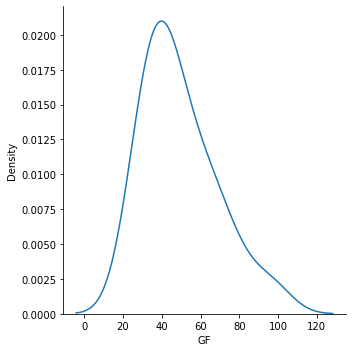

In [38]:
sns.displot(df_sample, x="GF", kind="kde")


2. Calculate the p-values ​​and say if they reject the null hypothesis by taking a 5% alpha.

Cheking the correlation between the selected two variables:

H0: There is a dependency between the variables.
H1: The two variables are independent.

In [39]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [df_sample['V']]
data2 = [df_sample['GF']]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=0.839, p=0.000
Probably dependent


THe result of our test confirm the null hypothesis. It exists correlation beetween the two selected variables.

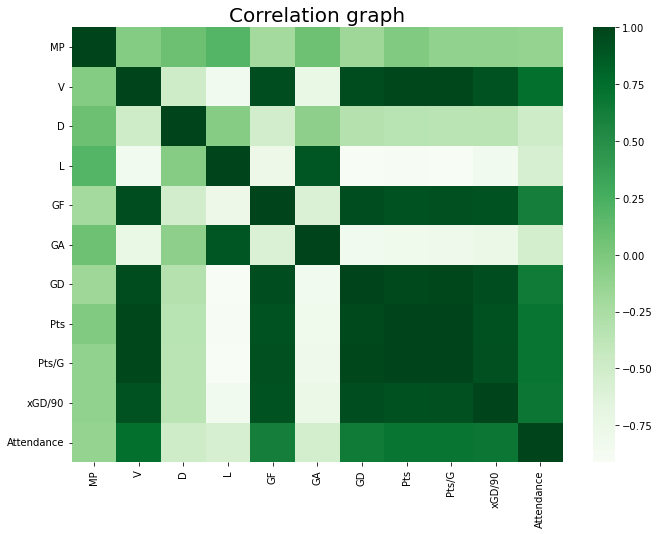

In [40]:
corr = df_sample.corr()
plt.figure(figsize=(11,8))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, cmap="Greens")
plt.show()

#### 3. Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

#### Let display a small brief of the dataset visualizing the Soccer Clubs per Country.

In [41]:
y = df.Country.value_counts()

labels = y.index

In [42]:
#explode will make some wedge in our chart. 

explode = [i/24 for i in range(3,len(y)+3)]
for x in explode[0:17]:
    explode[explode.index(x)]=0   #using just the last 3 elements
explode[-1] = 1.2   

In [43]:
#here will define map of colors for our plotp

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Greens #this line allows us to change the colors
colors =colormap(normdata(y))

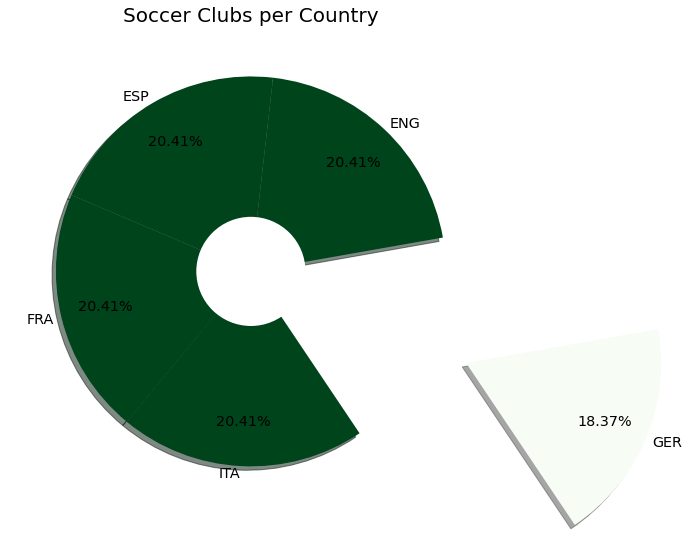

In [44]:
#ploting a pie chart

fig1, ax1 = plt.subplots(figsize=(10,12))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'x-large'})


ax1.set_title("Soccer Clubs per Country",fontsize=20)

#plt.legend(title = "Airlines:",labels=labels,loc="bets")


#draw inner circle
centre_circle = plt.Circle((0,0),.28,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()

#plt.savefig('Anual_flights_PieChart.png') #save it

plt.show()

In [45]:
df_sample['Attendance'].mean()

23346.3

In [46]:
#CAlculate the mean of groupy categorical variables and one numerical variable
df_sample.groupby(by='Country')['Attendance'].apply(lambda x: x.mean())

Country
ENG    37381.750000
ESP    12599.000000
FRA    14729.200000
GER    25370.333333
ITA    29311.500000
Name: Attendance, dtype: float64

In [47]:
#CAlculate the mean of groupy categorical variables and one numerical variable
df_avg = df_sample.groupby('Country')['Attendance'].mean()
df_avg

Country
ENG    37381.750000
ESP    12599.000000
FRA    14729.200000
GER    25370.333333
ITA    29311.500000
Name: Attendance, dtype: float64

In [48]:
df_sample.groupby('Country')['Attendance'].mean()
#df_avg.columns = ['Country', 'Mean_Attendance']
df_avg

Country
ENG    37381.750000
ESP    12599.000000
FRA    14729.200000
GER    25370.333333
ITA    29311.500000
Name: Attendance, dtype: float64

No we are ready to determinate whether or not there is a statistically significant difference between the medians of the three selected  groups, in this case the ITA, ESP, GER Attenders values:

Interpretation

H0: The population median of all of the groups are equal.

H1: The population median of all of the groups are not equal.

#### Let crate the numpy lists that we will working on:

Let create the list for Italian Attendance values:

In [50]:
DataIta = pd.DataFrame(df_sample[df_sample.Country == 'ITA'])
DataIta


,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
93,93,Genoa,ITA,19,37,4,16,17,27,59,-32,28,0.76,36.8,50.6,-13.8,-0.37,L W L W L,11628,Mattia Destro - 9,Salvatore Sirigu
6,6,Milan,ITA,1,37,25,8,4,66,31,35,83,2.24,60,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
7,7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
22,22,Lazio,ITA,5,36,18,8,10,72,53,19,62,1.72,52.3,45.8,6.5,0.18,W D L W W,21235,Ciro Immobile - 27,Thomas Strakosha


In [51]:
AttendanceIta = DataIta['Attendance'].to_numpy()
AttendanceIta

array([11628, 42388, 41995, 21235])

Let create the list for Spanish Attendance values:

In [52]:
DataEsp = pd.DataFrame(df_sample[df_sample.Country == 'ESP'])
DataEsp

,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
69,69,Getafe,ESP,14,37,8,15,14,32,38,-6,39,1.05,28.3,36.5,-8.2,-0.22,W D D D D,8702,Enes Ünal - 15,David Soria
88,88,Alavés,ESP,20,37,8,7,22,31,64,-33,31,0.84,36.6,56.7,-20.2,-0.55,L W L W L,10942,Joselu - 14,Fernando Pacheco
74,74,Granada,ESP,16,37,8,13,16,44,61,-17,37,1.00,39.5,61,-21.6,-0.58,D D W W L,13475,Jorge Molina - 10,Luís Maximiano
67,67,Espanyol,ESP,13,37,10,11,16,40,53,-13,41,1.11,37.5,50,-12.5,-0.34,L L D L D,17277,Raúl de Tomás - 17,Diego López


In [53]:
AttendanceEsp = DataEsp['Attendance'].to_numpy()
AttendanceEsp

array([ 8702, 10942, 13475, 17277])

Let create the list for German Attendance values:

In [54]:
DataGer = pd.DataFrame(df_sample[df_sample.Country == 'GER'])
DataGer

,Rank,Club,Country,LgRk,MP,V,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,LAst5,Attendance,Top Team Scorer,Goalkeeper
91,91,Arminia,GER,17,34,5,13,16,27,53,-26,28,0.82,28.2,62.3,-34.1,-1.00,L L D L D,16773,Masaya Okugawa - 8,Stefan Ortega
4,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
55,55,Eint Frankfurt,GER,11,34,10,12,12,45,49,-4,42,1.24,44.2,51.5,-7.3,-0.21,L D L D D,26162,Rafael Borré - 8,Kevin Trapp


In [55]:
AttendanceGer = DataGer['Attendance'].to_numpy()
AttendanceGer

array([16773, 33176, 26162])

In [58]:
#Kruskal test:
from scipy import stats
stats.kruskal(AttendanceIta, AttendanceEsp, AttendanceGer)



KruskalResult(statistic=4.348484848484851, pvalue=0.11369425306313584)

Since this p-value is less than 0.05, we can reject the null hypothesis that the median Attendance data is the same for all three Countries.

Bibliografía:

- UnicodeDecodeError: 'utf-8' codec can't decode bytes in position https://stackoverflow.com/questions/55193168/unicodedecodeerror-utf-8-codec-cant-decode-bytes-in-position-0-1-invalid-co

- Statistical hypotesis tutorials: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

- Kruskaltest: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
